In [1]:
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

In [2]:
X,y = make_circles(n_samples=1000, noise=0.1, random_state=1)

In [3]:
n_train = 500

trainX, testX = X[:n_train,:], X[n_train:,:]

trainy, testy = y[:n_train], y[n_train:]

In [4]:
trainX[:5]

array([[ 0.92787748, -0.04521731],
       [-0.54303182, -0.75444674],
       [ 0.9246533 , -0.71492522],
       [-0.10217077, -0.89283523],
       [-1.01719242,  0.24737775]])

In [5]:
trainy[:5]

array([1, 1, 0, 0, 0], dtype=int64)

## DEFINE MODEL

In [6]:
model = Sequential()
model.add(Dense(50, input_dim=2,activation='relu', kernel_initializer='glorot_uniform'))

model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.01, momentum=0.9)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

## FIT MODEL

In [7]:
history = model.fit(trainX, trainy, validation_data=(testX,testy), epochs=100, verbose=0)

## EVALUATE THE MODEL

In [8]:
_, train_acc = model.evaluate(trainX,trainy,verbose=0)
_, test_acc = model.evaluate(testX,testy,verbose=0)
print(f'Train:{train_acc} Test:{test_acc}')

Train:0.8320000171661377 Test:0.8479999899864197


## PLOT HISTORY

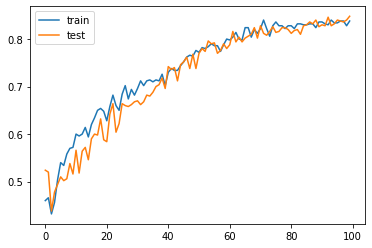

In [10]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## BATCH NORMALIZATION

In [12]:
from tensorflow.keras.layers import BatchNormalization

In [13]:
model = Sequential()

model.add(Dense(50, input_dim=2,activation='relu', kernel_initializer='he_uniform'))

model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.01, momentum=0.9)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [14]:
history = model.fit(trainX, trainy, validation_data=(testX,testy), epochs=100, verbose=0)

In [15]:
_, train_acc = model.evaluate(trainX,trainy,verbose=0)
_, test_acc = model.evaluate(testX,testy,verbose=0)
print(f'Train:{train_acc} Test:{test_acc}')

Train:0.8379999995231628 Test:0.8539999723434448


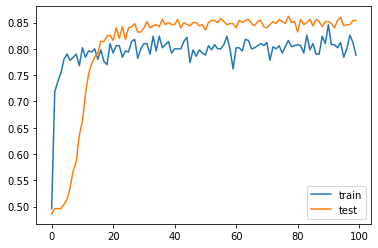

In [16]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()